# Matplotlib

## Introduction

Matplotlib is the most common module for creating visualizations in Python (it's almost a standard on its own). The visualization are not interactive, but they are simple to create and the module is very powerful when you learn it more deeply. Here I will give a very lightweight introduction, for reference, but you can follow the links to the documentation to learn more as you need.

## Importing

The `pyplot` submodule of `matplotlib` is usually imported as `plt`. There are other ways to use `matplotlib`, but `pyplot` is the easiest and most accessible for beginners, so we'll stick to that for this lecture.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Plot

The easiest way to create a plot is to call `plt.plot`, which is like a swiss-army knife that can do a lot of things. For example, see the plot below where we simply plot a bunch of random numbers. It couldn't be simpler than that.

Y = [2.81717379 2.18270723 2.60462339 2.75045929 2.92871439 2.88216291
 2.83192408 2.5262039  2.14655534 2.74907629]


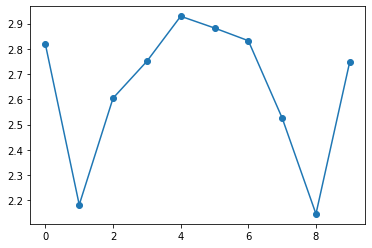

In [10]:
Y = np.random.rand(10) + 2
print("Y =", Y)

plt.plot(Y, 'o-')

plt.show()

The `Y` array has 10 random numbers in the interval [0, 1], which are plotted in the y axis. By default, `plt.plot` generates a *line* plot, so the points are connected with lines. Notice that, since the x axis was not provided by us, `plt` generated it automatically (with a sequence of integers from 0 to 9). There are many other defaults at work here, including the blue color of the plot.

Let's try to make something a bit more interesting. The plot below combines three different functions, each with their own customized appearance.

t = [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8]


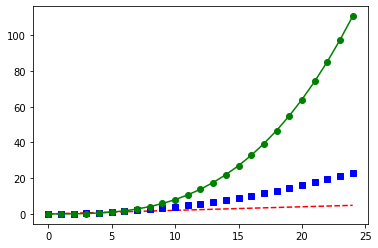

In [25]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)
print("t =", t)

# red dashes, blue squares, and green circles with lines
plt.plot(t, 'r--')
plt.plot(t ** 2, 'bs')
plt.plot(t ** 3, 'go-')

plt.show()

Notice the vectorized powers of 2 and 3 (`t**2`, `t**3`) in the `plot` calls.

As you can see, the `plt` interface has a hidden state stored in the background: every subsequent call builds on top of the previous one, until you call `show` and the plot is presented with everything.

The syntax in the format strings follows very closely the matlab syntax. See the *Notes* section in the [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) for a full description. By the way, the example above was adapted from the official pyplot tutorial at https://matplotlib.org/tutorials/introductory/pyplot.html. Please check it out if you want to learn more.

Below we add some descriptions to the graph in order to make it more informative: a title, labels for both axes, and a legend. These supporting features may look like small additions to your plot, but they really make a difference in the end, when presenting your results.

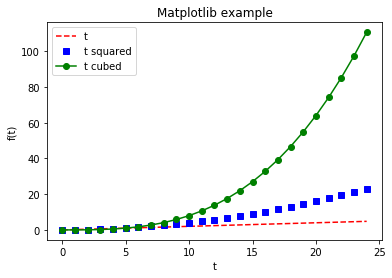

In [32]:
# Reusing t from previous cell

def sqr(X):
    return X ** 2

# Notice the "label" arguments added to each plot
plt.plot(t, 'r--', label='t')
plt.plot(sqr(t), 'bs', label='t squared')
plt.plot(t**3, 'go-', label='t cubed')

plt.legend()
plt.title("Matplotlib example")
plt.xlabel("t")
plt.ylabel("f(t)")

plt.show()

## Scatter Plot

In the plots above you can remove the lines (or dashes) in order to make a scatter plot, but you can't vary the colors or sizes of the points. For that, you need to call `plt.scatter`.

Let's get a bit more advanced with our examples, and generate some artificial data from a linear model. The `line` function below takes as input the x values we would like to plot and the parameters `(a, b)` of a line, then generates the y values from the line equation: `y = a * x + b`. By default, `a = 1` and `b = 1`.

In [11]:
def line(X, a=1, b=1):
    return a * X + b

Let's start by plotting the line with random x values, using what we already know. The X array is sorted simply to make the *line* output a bit clearer (but it doesn't make any difference for the *scatter* plot).

X = [0.02471139 0.04408271 0.10296668 0.1677168  0.24617482 0.25175605
 0.27018318 0.27238371 0.27985712 0.30918097 0.35877966 0.36898203
 0.3948229  0.42328219 0.4269417  0.45425481 0.46380475 0.46935927
 0.47799472 0.49198116 0.52457406 0.53619602 0.54356794 0.55031639
 0.56055786 0.56592721 0.59485038 0.59622782 0.60211003 0.65030052
 0.65185149 0.66228206 0.6744612  0.67585462 0.68493742 0.69557533
 0.69853363 0.72307445 0.73181367 0.77132325 0.77700259 0.80466586
 0.82570633 0.83607619 0.84537262 0.86227193 0.88845412 0.91290202
 0.91646293 0.97321315]


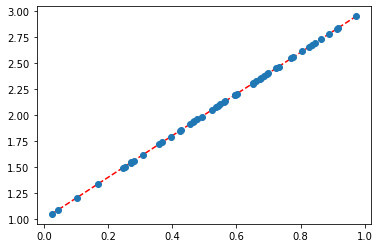

In [18]:
X = np.sort(np.random.rand(50))
print("X =", X)

plt.plot(X, line(X, a=2), 'r--')
plt.plot(X, line(X, a=2), 'o')

plt.show()

I will now add some noise to the points "predicted" by the line, i.e., I will "shake" the points a little bit. This is more realistic than having all the points in the line itself, since in the real world, data sets are always at least a little bit noisy (even those with a very clear underlying model). The noise is sampled from a Gaussian (or normal) distribution, but don't worry if you don't understand what that means; it's just random noise anyway.

(50,)


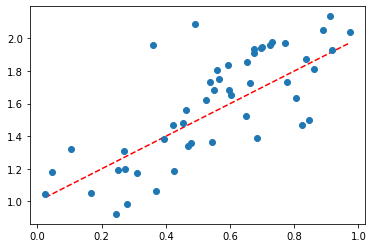

In [19]:
noise = 0.2 * np.random.randn(X.shape[0])
print(X.shape)

# reusing X from the previous cell
plt.plot(X, line(X), 'r--')
plt.plot(X, line(X) + noise, 'o')

plt.show()

Finally, I will now use `scatter` to change the points' appearances in order to show the "error" (noise) of each point. Points closer to the line will be larger, and thus more visible, while points farther from the line will be smaller and less salient. The color will also reflect the same thing.

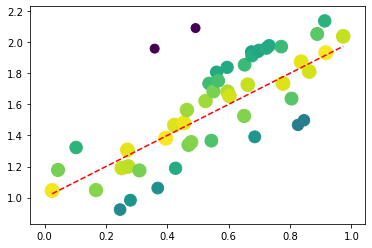

In [20]:
# reusing X and noise from the previous cells
plt.plot(X, line(X), 'r--')
plt.scatter(X, line(X) + noise, c=1-abs(noise), s=200-abs(noise)*200)

plt.show()

The syntax is similar to `plot` when it comes to the X and Y arrays, but now we have the `c` and the `s` arguments for *colors* and *sizes* respectively. The values of the noise were automatically mapped into colors using a default colormap called *viridis*, but you can change that if you want (see the [nice documentation](https://matplotlib.org/tutorials/colors/colormaps.html) for many options).

Notice that I used the absolute value of the noise (because I am not interested in whether it's positive or negative), and that I inverted it by taking `1-abs(noise)`, because I wanted lighter colors near the line. 

I did a similar thing with the size (inverting the values), but here you have to take care about the scale of the values. In `scatter`, the size provided is related to the *area* of the circle, i.e. the square of the pixels. So, for example, `s=400` translates into a 20 x 20 area (it is kinda complicated in the beginning and takes practice and experience to use it naturally).

## Bars

For categorical values, sometimes the most effective solution is the simplest: a bar chart. You can call `bar` on `pyplot` for creating bar charts. See the example below.

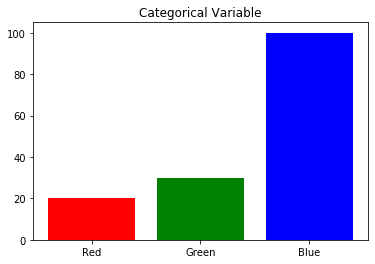

In [21]:
names = ['Red', 'Green', 'Blue']
values = [20, 30, 100]

plt.bar(names, values, color=['r', 'g', 'b'])

plt.title('Categorical Variable')
plt.show()

## Histogram

For those of you who might not know about the normal distribution, below is an example of how it looks like. I sampled 10000 points out of the distribution, and the heights of the bars show how many points fall within each region of the x axis.

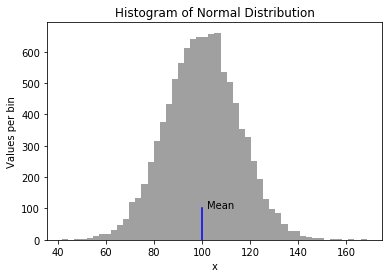

In [23]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
plt.hist(x, 50, facecolor='gray', alpha=0.75)

plt.xlabel('x')
plt.ylabel('Values per bin')
plt.title('Histogram of Normal Distribution')

# Extra annotation with line and text
plt.plot([mu, mu], [0, 100], 'b')
plt.text(mu + 2, 100, 'Mean')

plt.show()

## Heatmaps (`imshow`)

Another useful and interesting type of visualization provided by matplotlib is the possibility of plotting an entire matrix as a heatmap, using `imshow`. For starters, see the example below using random data. Again, it couldn't be simpler.

(10, 10)
X =
[[8.77692073e-01 6.65691365e-01 4.99115273e-01 8.09823550e-01
  7.99817205e-01 8.81402745e-01 2.85943074e-02 4.87549364e-01
  7.64623136e-01 3.89490975e-03]
 [3.43391765e-01 7.91745465e-01 3.20317353e-02 2.41194461e-01
  4.58954111e-01 7.58106447e-01 1.63587833e-01 6.15349066e-01
  5.50045037e-02 8.90899768e-01]
 [9.61302789e-01 9.02791662e-02 9.82688257e-01 2.15512562e-01
  8.17557087e-01 9.84044834e-02 1.26511142e-01 7.68818071e-04
  3.02292412e-02 8.63683920e-01]
 [7.34072470e-01 8.39975194e-01 6.02162684e-02 8.29589751e-01
  7.82697400e-01 6.53950291e-01 5.72205788e-01 3.38389527e-01
  5.05773393e-01 7.95021774e-02]
 [7.53772879e-01 8.64545590e-01 7.57607028e-01 7.01260506e-02
  9.53235474e-01 2.83328906e-02 8.08554130e-01 8.39852919e-01
  2.89311334e-01 5.89882441e-01]
 [7.10897822e-01 8.64825311e-01 7.76774806e-01 3.87224846e-01
  1.27842544e-01 5.24089639e-01 4.59688731e-01 5.02574020e-01
  9.75916164e-01 6.87189763e-01]
 [6.02677663e-01 7.33881640e-01 4.46287301e-0

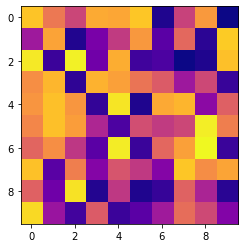

In [27]:
import matplotlib.cm as cm

X = np.random.rand(10,10)
print(X.shape)
print("X =")
print(X)
plt.imshow(X, cmap=cm.plasma)
plt.show()

While the figure doesn't mean anything (it's just random noise), it shows you how easy it is to draw a bitmap, for example, or a matrix of values. Here I am using the "plasma" colormap.

The example below is maybe slightly more interesting. I'm setting the value of each cell of an (initially empty) matrix of size NxN as the (squared) distance from the cell to the center of the matrix, i.e., the coordinate (N/2, N/2). 

The center is light yellow because the distance is small, and the corners are dark blue because the distance is large. This is according to colormap used, "YlGnBu" (yellow-green-blue). Matplotlib has a magnificent documentation for colormaps, please check it out: https://matplotlib.org/3.2.0/tutorials/colors/colormaps.html

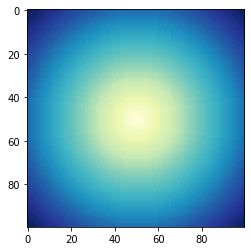

In [29]:
N = 100
img = np.empty((N,N), dtype=np.uint32)
for i in range(N):
    for j in range(N):
        # squared distance from cell to the center of the matrix
        img[i, j] = np.sqrt((i-N/2)**2 + (j-N/2)**2)
plt.imshow(img, cmap='YlGnBu')
plt.show()

By changing the value of N in the previous cell you can change the size of the matrix and, by consequence, the resolution of the grid.

# Subplots

If you want to combine different plots in the same visualization, `matplotlib` provides the functionality of `subplots`. The example below breaks one of our previous examples into three different plots, side-by-side. 

Before drawing on a subplot, you must call `plt.subplot` with a number that indicates (a) the number of rows you want on the grid, (b) the number of columns, and (c) the current subplot. So, for example, 131 means 1 row, 3 columns, and the current subplot is 1 (the first one on the left).

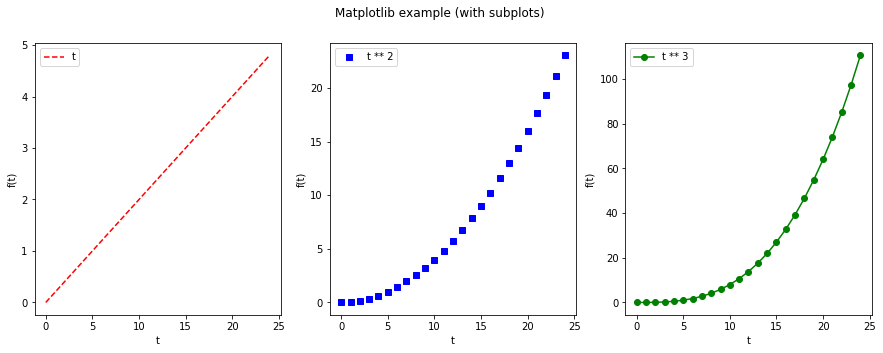

In [38]:
# Reusing t from previous cell

plt.figure(figsize=(15,5))
plt.suptitle("Matplotlib example (with subplots)")

# Notice the "label" arguments added to each plot
plt.subplot(131)
plt.plot(t, 'r--', label='t')
plt.legend()
plt.xlabel("t")
plt.ylabel("f(t)")

plt.subplot(132)
plt.plot(t**2, 'bs', label='t ** 2')
plt.legend()
plt.xlabel("t")
plt.ylabel("f(t)")

plt.subplot(133)
plt.plot(t**3, 'go-', label='t ** 3')
plt.legend()
plt.xlabel("t")
plt.ylabel("f(t)")

plt.show()

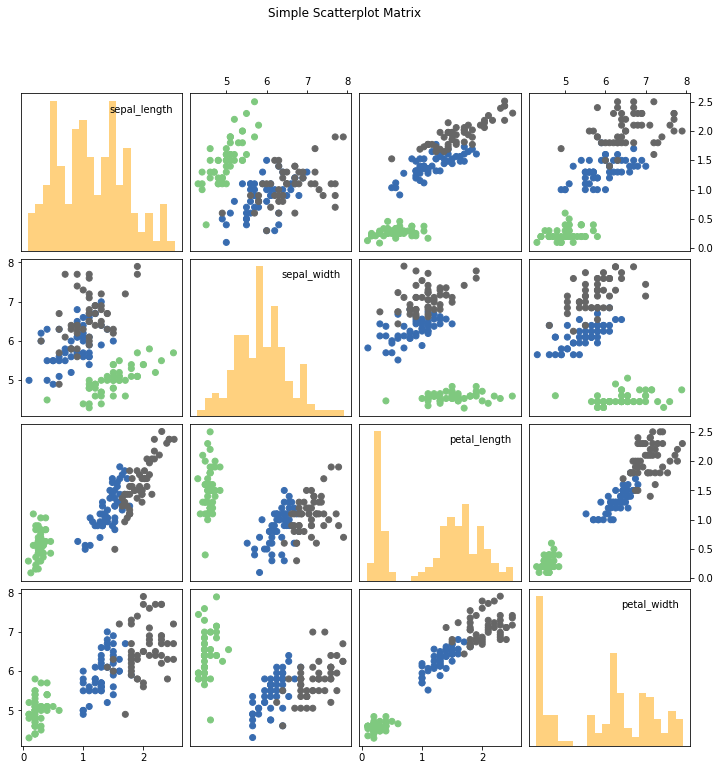

In [39]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def scatterplot_matrix(data, names, labels):
    """Plots a scatterplot matrix of subplots.  Each row of "data" is plotted
    against other rows, resulting in a nrows by nrows grid of subplots with the
    diagonal subplots labeled with "names".  Additional keyword arguments are
    passed on to matplotlib's "plot" command. Returns the matplotlib figure
    object containg the subplot grid."""
    numvars, numdata = data.shape
    fig, axes = plt.subplots(nrows=numvars, ncols=numvars, figsize=(12,12))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    label_set = list(set(labels))
    colors = [label_set.index(x) for x in labels]

    for ax in axes.flat:
        # Hide all ticks and labels
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

        # Set up ticks only on one side for the "edge" subplots...
        if ax.is_first_col():
            ax.yaxis.set_ticks_position('left')
        if ax.is_last_col():
            ax.yaxis.set_ticks_position('right')
        if ax.is_first_row():
            ax.xaxis.set_ticks_position('top')
        if ax.is_last_row():
            ax.xaxis.set_ticks_position('bottom')

    # Plot the data.
    for i, j in zip(*np.triu_indices_from(axes, k=1)):
        for x, y in [(i,j), (j,i)]:
#             axes[x,y].plot(data[x], data[y], 'ro')
            axes[x, y].scatter(data[x], data[y], c=colors, cmap="Accent")

    # Label the diagonal subplots...
    for i, label in enumerate(names):
        axes[i,i].annotate(label, (0.75, 0.9), xycoords='axes fraction',
                ha='center', va='center')
        axes[i,i].hist(data[i], 20, facecolor='orange', alpha=0.5)
        

    # Turn on the proper x or y axes ticks.
    for i, j in zip(range(numvars), itertools.cycle((-1, 0))):
        axes[j,i].xaxis.set_visible(True)
        axes[i,j].yaxis.set_visible(True)

    return fig


col_names = open("iris.csv").readline().split(",")[:-1]
data = np.loadtxt("iris.csv", delimiter=',', skiprows=1, usecols=range(4)).T
labels = np.loadtxt("iris.csv", delimiter=',', skiprows=1, usecols=4, dtype='str')
fig = scatterplot_matrix(data, col_names, labels)
fig.suptitle('Simple Scatterplot Matrix')
plt.show()

The scatterplot matrix above was adapted from: https://stackoverflow.com/questions/7941207/is-there-a-function-to-make-scatterplot-matrices-in-matplotlib